Purpose: I ran the RNAseq pipeline (Jeremy's) and at least one sample has a mapping rate in the 50% range. I want to find out exactly which samples are low mapping here.<br>
Author: Anna Pardo<br>
Date initiated: March 29, 2023

In [1]:
# import modules
import pandas as pd

In [2]:
# load mapping rate data
mr = pd.read_csv("B73HS_salmonmap.csv",sep=",",header="infer")
mr.head()

,File,Sample,Percent_Mapped
0,/mnt/scratch/haberan2/Core_Stress_Response/01_...,SRR8857768,85.072476
1,/mnt/scratch/haberan2/Core_Stress_Response/01_...,SRR15241296,91.151922
2,/mnt/scratch/haberan2/Core_Stress_Response/01_...,SRR8857796,87.484671
3,/mnt/scratch/haberan2/Core_Stress_Response/01_...,SRR8857829,85.557031
4,/mnt/scratch/haberan2/Core_Stress_Response/01_...,SRR15241111,87.258095


In [5]:
# load SRR metadata
md = pd.read_csv("srr_numbers_with_metadata_27-Mar-2023.tsv",sep="\t",header="infer",usecols=["BioProject","SRA_number",
                                                                                             "Replicate_num","Genotype",
                                                                                             "Treatment","Time_after_treatment",
                                                                                             "Concentration","Developmental Stage",
                                                                                             "Tissue"])
md.head()

,BioProject,SRA_number,Replicate_num,Genotype,Treatment,Time_after_treatment,Concentration,Developmental Stage,Tissue
0,PRJNA378714,SRR5344453,1.0,B73,Control,3 days,NaN,V3,Shoot
1,PRJNA378714,SRR5344560,2.0,B73,Control,3 days,NaN,V3,Shoot
2,PRJNA378714,SRR5344568,3.0,B73,Control,3 days,NaN,V3,Shoot
3,PRJNA378714,SRR5344570,1.0,B73,Drought,3 days,NaN,V3,Shoot
4,PRJNA378714,SRR5344571,3.0,B73,Drought,3 days,NaN,V3,Shoot


In [6]:
md.rename(columns={"SRA_number":"Sample"},inplace=True)
md.head()

,BioProject,Sample,Replicate_num,Genotype,Treatment,Time_after_treatment,Concentration,Developmental Stage,Tissue
0,PRJNA378714,SRR5344453,1.0,B73,Control,3 days,NaN,V3,Shoot
1,PRJNA378714,SRR5344560,2.0,B73,Control,3 days,NaN,V3,Shoot
2,PRJNA378714,SRR5344568,3.0,B73,Control,3 days,NaN,V3,Shoot
3,PRJNA378714,SRR5344570,1.0,B73,Drought,3 days,NaN,V3,Shoot
4,PRJNA378714,SRR5344571,3.0,B73,Drought,3 days,NaN,V3,Shoot


In [7]:
# and merge with mr
mrd = mr.merge(md,how="inner")
mrd.head()

,File,Sample,Percent_Mapped,BioProject,Replicate_num,Genotype,Treatment,Time_after_treatment,Concentration,Developmental Stage,Tissue
0,/mnt/scratch/haberan2/Core_Stress_Response/01_...,SRR8857768,85.072476,PRJNA520822,3.0,B73,Heat,2 hours,NaN,V3,Leaf
1,/mnt/scratch/haberan2/Core_Stress_Response/01_...,SRR15241296,91.151922,PRJNA747925,5.0,B73,Control,1 hour,NaN,V2/V3,Leaf
2,/mnt/scratch/haberan2/Core_Stress_Response/01_...,SRR8857796,87.484671,PRJNA520822,3.0,B73,Control,0 hour,NaN,V3,Stalk
3,/mnt/scratch/haberan2/Core_Stress_Response/01_...,SRR8857829,85.557031,PRJNA520822,1.0,B73,Heat,48 hours,NaN,V3,Root
4,/mnt/scratch/haberan2/Core_Stress_Response/01_...,SRR15241111,87.258095,PRJNA747925,1.0,B73,Control,4 hours,NaN,V2/V3,Leaf


In [8]:
# plot mapping rate by BioProject
# load plotting modules
from matplotlib import pyplot as plt
import seaborn as sns

<AxesSubplot: xlabel='Percent_Mapped', ylabel='BioProject'>

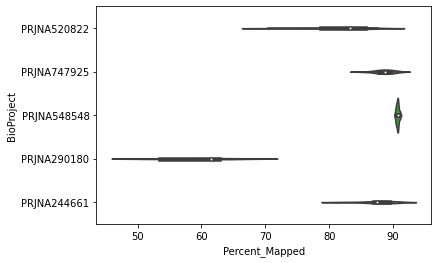

In [14]:
sns.violinplot(data=mrd,y="BioProject",x="Percent_Mapped")

<AxesSubplot: xlabel='Treatment', ylabel='Percent_Mapped'>

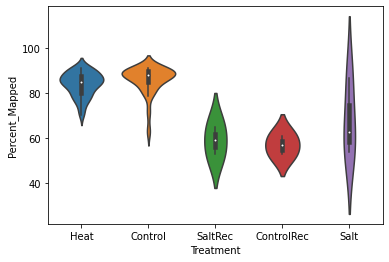

In [12]:
sns.violinplot(data=mrd,x="Treatment",y="Percent_Mapped")

<AxesSubplot: xlabel='Percent_Mapped', ylabel='Developmental Stage'>

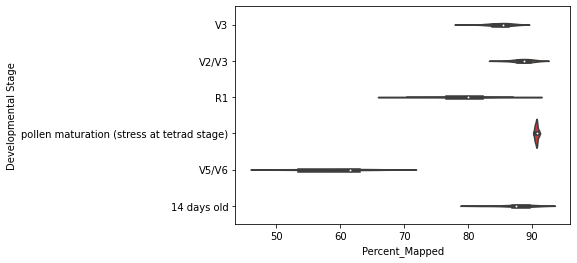

In [15]:
sns.violinplot(data=mrd,y="Developmental Stage",x="Percent_Mapped")

In [16]:
# subset to PRJNA290180 only and check out the mapping rates there
prj = mrd[mrd["BioProject"]=="PRJNA290180"]

<AxesSubplot: xlabel='BioProject', ylabel='Percent_Mapped'>

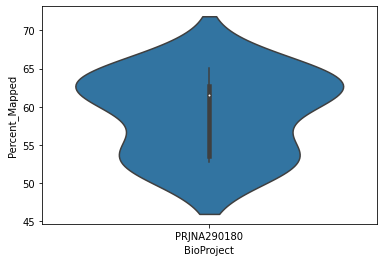

In [17]:
sns.violinplot(data=prj,y="Percent_Mapped",x="BioProject")

<AxesSubplot: xlabel='Treatment', ylabel='Percent_Mapped'>

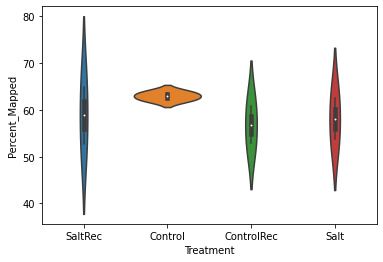

In [18]:
sns.violinplot(data=prj,y="Percent_Mapped",x="Treatment")

Aside from the control samples having a much tighter mapping rate distribution, there's not a ton of bias within the BioProject. The whole thing just has a lower mean. Let's find out how many samples were on the low end.

In [19]:
prj

,File,Sample,Percent_Mapped,BioProject,Replicate_num,Genotype,Treatment,Time_after_treatment,Concentration,Developmental Stage,Tissue
11,/mnt/scratch/haberan2/Core_Stress_Response/01_...,SRR2106202,65.014588,PRJNA290180,2.0,B73,SaltRec,7 days,NaN,V5/V6,Leaf
17,/mnt/scratch/haberan2/Core_Stress_Response/01_...,SRR2106180,63.678444,PRJNA290180,1.0,B73,Control,10 days,0.1 dS/m,V5/V6,Leaf
43,/mnt/scratch/haberan2/Core_Stress_Response/01_...,SRR2106200,60.797304,PRJNA290180,2.0,B73,ControlRec,7 days,NaN,V5/V6,Leaf
53,/mnt/scratch/haberan2/Core_Stress_Response/01_...,SRR2106182,53.691677,PRJNA290180,1.0,B73,Salt,10 days,15 dS/m,V5/V6,Leaf
68,/mnt/scratch/haberan2/Core_Stress_Response/01_...,SRR2106196,62.307768,PRJNA290180,2.0,B73,Control,10 days,0.1 dS/m,V5/V6,Leaf
77,/mnt/scratch/haberan2/Core_Stress_Response/01_...,SRR2106184,52.848761,PRJNA290180,1.0,B73,ControlRec,7 days,NaN,V5/V6,Leaf
98,/mnt/scratch/haberan2/Core_Stress_Response/01_...,SRR2106186,52.803283,PRJNA290180,1.0,B73,SaltRec,7 days,NaN,V5/V6,Leaf
100,/mnt/scratch/haberan2/Core_Stress_Response/01_...,SRR2106198,62.485135,PRJNA290180,2.0,B73,Salt,10 days,15 dS/m,V5/V6,Leaf


There are 3 low-mapping (between 50-55%) samples in this BioProject, but none of them are reps of each other. I would guess this is probably okay.